In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import imageio

plt.rcParams['font.sans-serif']=['STHeiti']
plt.rcParams['axes.unicode_minus'] = False

from scipy import stats
from scipy.stats import norm, skew  # for some statistics

from pyecharts import options as opts
from pyecharts.charts import Map, Page, Timeline, Grid
from pyecharts.charts import Geo, Bar, Line, Gauge, Pie
from pyecharts.globals import ChartType, SymbolType
from pyecharts.globals import ThemeType

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
# 选择模型参数
from sklearn.model_selection import GridSearchCV
# KNNR参数选择
from sklearn.neighbors import KNeighborsRegressor
# RandomForest参数选择
from sklearn.ensemble import RandomForestRegressor

# 设定默认字体
from pylab import mpl
# 导入自定义工具

import Utils.utils as utils
#mpl.rcParams['font.sans-serif'] = ['SimHei']

path = './datasets/house-price/'

bj_house = utils.load_data(path, file_name='bj_house.csv')
# sh_house = utils.load_data(path, file_name='shanghai_7w.xlsx', is_csv=False)

# 查看数据集信息
# na_data = utils.nan_data_rate(bj_house, 5)
# num_lst, class_lst = utils.describle_data(bj_house)
# print("缺失率", na_data)
# print(num_lst, class_lst)

数据集 bj_house.csv 加载成功
变量名为: ['id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers', 'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor', 'buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty', 'subway', 'district', 'communityAverage', 'period', 'sta_square', 'sta_price', 'avg_price', 'avg_community', 'trade_year']


In [ ]:
# 绘制缺失率直方图
utils.show_bar(na_data.index, na_data['Missing_Ratio'], "Rate of Missing Value")

In [2]:
import pandas as pd
# 缺失值填补
# 房屋的厨房数，卫生间数。客厅数等都与住房面积高度相关
squ_bins = [-1,20,50,90,120,160,200,2000]
bj_house['squ_level'] = pd.cut(bj_house['square'],bins=squ_bins,labels = ['20平以下','20-50','50-90','90-120','120-160','160-200','200平以上'])
bj_house.loc[bj_house['livingRoom']=='#NAME?','livingRoom'] = None

In [3]:
bj_house['livingRoom'] = bj_house.groupby('squ_level')['livingRoom'].transform(lambda x:x.fillna(x.median()))
bj_house['livingRoom'] = bj_house['livingRoom'].map(lambda x: int(x))
bj_house['livingRoom'].unique()

array([2, 3, 1, 4, 5, 6, 9, 0, 7, 8])

In [4]:
bj_house['drawingRoom'] = bj_house.groupby('squ_level')['drawingRoom'].transform(lambda x:x.fillna(x.median()))
bj_house['drawingRoom'] = bj_house['drawingRoom'].map(lambda x: int(x))
sum(bj_house['drawingRoom'].isnull())

0

In [6]:
bj_house['kitchen'] = bj_house.groupby('squ_level')['kitchen'].transform(lambda x:x.fillna(x.median()))
bj_house['kitchen'] = bj_house['kitchen'].map(lambda x: int(x))
sum(bj_house['kitchen'].isnull())

0

In [7]:
bj_house['bathRoom'] = bj_house.groupby('squ_level')['bathRoom'].transform(lambda x:x.fillna(x.median()))
bj_house['bathRoom'] = bj_house['bathRoom'].map(lambda x: int(x))
sum(bj_house['bathRoom'].isnull())

0

In [8]:
bj_house['num_room'] = bj_house['livingRoom'].map(lambda x:int(x))+bj_house['drawingRoom'].map(lambda x:int(x))+bj_house['kitchen'].map(lambda x:int(x))+bj_house['bathRoom'].map(lambda x:int(x))
bj_house['living_rate'] = bj_house['livingRoom'].map(lambda x:int(x)) / bj_house['num_room']

In [9]:
bj_house['buildingType'] = bj_house['buildingType'].fillna('无类型')
bj_house.loc[bj_house['buildingType'] == 1,'buildingType'] = '塔楼'
bj_house.loc[bj_house['buildingType'] == 2,'buildingType'] = '平房'
bj_house.loc[bj_house['buildingType'] == 3,'buildingType'] = '板塔结合'
bj_house.loc[bj_house['buildingType'] == 4,'buildingType'] = '板楼'
bj_house['buildingType'].unique()

array(['塔楼', '板楼', '板塔结合', '无类型', '平房'], dtype=object)

In [10]:
# 缺失值填补
bj_house['renovationCondition'] = bj_house['renovationCondition'].fillna('其他')
bj_house.loc[bj_house['renovationCondition'] == 1,'renovationCondition'] = '其他'
bj_house.loc[bj_house['renovationCondition'] == 2,'renovationCondition'] = '毛坯'
bj_house.loc[bj_house['renovationCondition'] == 3,'renovationCondition'] = '简装'
bj_house.loc[bj_house['renovationCondition'] == 4,'renovationCondition'] = '精装'

sum(bj_house['renovationCondition'].isnull())

0

In [11]:
bj_house.loc[bj_house['district']==1,'district'] = '东城'
bj_house.loc[bj_house['district']==2,'district'] = '丰台'
bj_house.loc[bj_house['district']==3,'district'] = '亦庄'
bj_house.loc[bj_house['district']==4,'district'] = '大兴'
bj_house.loc[bj_house['district']==5,'district'] = '房山'
bj_house.loc[bj_house['district']==6,'district'] = '昌平'
bj_house.loc[bj_house['district']==7,'district'] = '朝阳'
bj_house.loc[bj_house['district']==8,'district'] = '海淀'
bj_house.loc[bj_house['district']==9,'district'] = '石景山'
bj_house.loc[bj_house['district']==10,'district'] = '西城'
bj_house.loc[bj_house['district']==11,'district'] = '通州'
bj_house.loc[bj_house['district']==12,'district'] = '门头沟'
bj_house.loc[bj_house['district']==13,'district'] = '顺义'
bj_house['district'].unique()

array(['朝阳', '昌平', '东城', '顺义', '西城', '丰台', '海淀', '大兴', '房山', '亦庄', '石景山',
       '门头沟', '通州'], dtype=object)

In [12]:
bj_house.loc[bj_house['buildingStructure']=='1','buildingStructure'] = '未知结构'
bj_house.loc[bj_house['buildingStructure']=='2','buildingStructure'] = '混和结构'
bj_house.loc[bj_house['buildingStructure']=='3','buildingStructure'] = '砖木结构'
bj_house.loc[bj_house['buildingStructure']=='4','buildingStructure'] = '砖混结构'
bj_house.loc[bj_house['buildingStructure']=='5','buildingStructure'] = '钢结构'
bj_house.loc[bj_house['buildingStructure']=='6','buildingStructure'] = '钢混结构'

In [10]:
# 统计各个区的房价中位数
def get_median(data,val,tar):
    return data.groupby(val)[tar].median()
dis_price_median = get_median(bj_house,'district','price')
dis_price_median.values

array(['朝阳', '昌平', '东城', '顺义', '西城', '丰台', '海淀', '大兴', '房山', '亦庄', '石景山',
       '门头沟', '通州'], dtype=object)

In [12]:
bj_house.head()

In [16]:
# 我们只研究2000年-2016年的房价信息
time_bins = ['1999','2004','2008','2012','2017']
bj_house['period'] = pd.cut(bj_house['constructionTime'], bins = time_bins,labels = ['2000-2004','2005-2008','2009-2012','2013-2016'])
bj_house['period'].value_counts()

2000-2004    77426
2005-2008    60164
2009-2012    29386
2013-2016     5034
Name: period, dtype: int64

In [17]:
def get_time_median(data,val,tar):
    time = ['%s'%i for i in range(2000,2017)]
    print(time)
    dic = {}
    for _ in time:
        # 提取指定年份数据
        temp = bj_house[bj_house['constructionTime']==_]
        temp = temp.loc[temp[val]!='亦庄']
        print(temp['constructionTime'].unique())
        # 调用函数获取分组信息
        res = get_median(temp,val,tar)
        print(res)
        dic[_] = [list(z) for z in zip(res.index,res.values)]
    return dic

In [ ]:
time_price = get_time_median(bj_house,'district','price')

In [ ]:
#时间轴轮播热力图
#这里两幅图所用数据差异不大,所以看不太出来区别
def timeline_map() -> Timeline:
    tl = Timeline()
    for price in time_price:
        geo_ = (
            Geo(init_opts = opts.InitOpts(width = 1200,height = 800)
               )
        .add_schema(maptype="北京")
        .add(
            "房屋均价",
            time_price[price],
            #[list(z) for z in zip(dis_price_median.index, dis_price_median.values)],
            type_=ChartType.HEATMAP,
        )
        .add(
            "地理坐标",
            time_price[price],
            type_=ChartType.EFFECT_SCATTER,blur_size = 8,color='yellow',
        )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True))
        .set_global_opts(title_opts=opts.TitleOpts(title="2000-2017年北京市各区房价(平米)中位数分布图"),
                         visualmap_opts=opts.VisualMapOpts(),
                         legend_opts = opts.LegendOpts(pos_right='right'))
        )
        tl.add(geo_, price)
    return tl

timeline_map().render('/Users/ashzerm/Documents/2020应用统计上半学期/统计学习/房价数据集/热力图.html')

In [18]:
# 自定义创建箱型图的函数
def create_box(data, x_name='', y_name='', title='', hue = '', order_=[], scatter_=True):
    plt.rcParams['font.sans-serif'] = ['SimHei']
    sns.boxplot(x=x_name, y=y_name, data=data,
                hue = hue,
                linewidth=2,  # 线宽
                width=0.8,  # 箱子之间的间隔比例
                fliersize=3,  # 异常点大小
                palette='hls',  # 设置调色板
                whis=1.5,  # 设置IQR
                notch=False,  # 设置是否以中值做凹槽
                order=order_)  # 筛选类别
    if scatter_ == True:
        sns.swarmplot(x=x_name, y=y_name, data=data, color='k', size=3, alpha=0.6)
    plt.legend(loc='upper left')
    plt.title(title)
    return

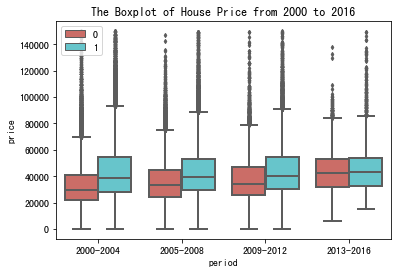

In [19]:
# 绘制各年份有无地铁平均房价分布图
create_box(bj_house,'period','price','The Boxplot of House Price from 2000 to 2016','subway',order_=['2000-2004','2005-2008','2009-2012','2013-2016'],scatter_=False)

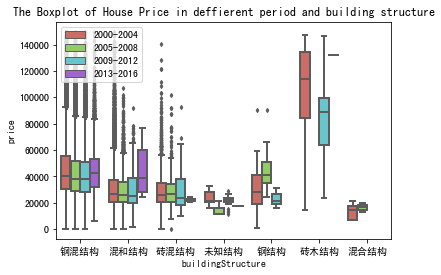

In [20]:
# 绘制建筑结构和房屋每平米价格分布图
create_box(bj_house,'buildingStructure','price','The Boxplot of House Price in deffierent period and building structure','period',order_=['钢混结构', '混和结构', '砖混结构', '未知结构', '钢结构', '砖木结构', '混合结构'],scatter_=False)

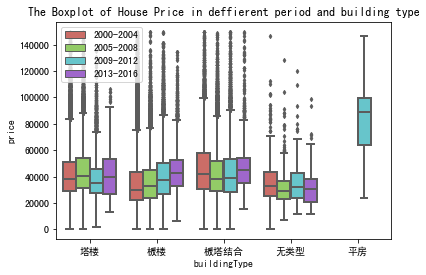

In [21]:
# 绘制建筑类型和房屋每平米价格分布图
create_box(bj_house, 'buildingType', 'price',
                      'The Boxplot of House Price in deffierent period and building type', 'period',
                      order_=['塔楼', '板楼', '板塔结合', '无类型', '平房'], scatter_=False)

In [ ]:
# 绘制散点图加边缘分布图
def create_sca_join(data, x='', y=''):
    fig = sns.JointGrid(x=x, y=y, data=data)
    fig.plot_joint(plt.scatter, color='m', edgecolor='white')  # 设置框内图表scatter
    fig.ax_marg_x.hist(data[x], color="b", alpha=0.6)
    fig.ax_marg_y.hist(data[y], color='r', alpha=0.6, orientation="horizontal")
    return

In [18]:
def max_min_scale(data):
    return (data - min(data)) / (max(data) - min(data))

In [ ]:
bj_house['sta_square'] = (bj_house['square'] - min(bj_house['square']))/(max(bj_house['square'])-min(bj_house['square']))
bj_house['sta_price'] = (bj_house['price'] - min(bj_house['price']))/(max(bj_house['price'])-min(bj_house['price']))
create_sca_join(bj_house,'sta_square','sta_price')

In [ ]:
# 判断成交总价是否等于每平米价格x建筑面积 不等于
sum(bj_house['totalPrice']-bj_house['square']*bj_house['price'])

In [ ]:
# 但有极强的共线性，因此用这个指标进行预测是无意义的
bj_house['avg_price'] = bj_house['totalPrice']/bj_house['square']
create_sca_join(bj_house,'avg_price','price')

In [20]:
bj_house['avg_community'] = max_min_scale(bj_house['communityAverage'])
create_sca_join(bj_house,'avg_community','sta_price')

In [ ]:
def get_year(date):
    return [i.split('/')[0] for i in date]

In [ ]:
# 计算建筑使用年限
bj_house1 = bj_house.loc[bj_house['constructionTime']!='未知',:].copy()
bj_house1['trade_year'] = get_year(bj_house1['tradeTime'])
bj_house1['used_year'] = bj_house1['trade_year'].map(lambda x:int(x))-bj_house1['constructionTime'].map(lambda x:int(x))

In [ ]:
bj_house1['used_year'].unique()

In [26]:
# bj_house.to_csv('/Users/ashzerm/item/house-price/datasets/house_price.csv',encoding = 'utf-8')

In [4]:
data = pd.read_csv('/Users/ashzerm/item/house-price/datasets/house_price.csv')

/Users/ashzerm/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,id,Lng,Lat,Cid,tradeTime,followers,totalPrice,price,square,livingRoom,...,district,communityAverage,period,sta_square,sta_price,avg_price,trade_year,squ_level,num_room,living_rate
0,1.01e+11,116.475489,40.019520,1.110000e+12,2016/8/9,106,415.0,31680,131.00,2,...,7,56021,2005-2008,0.071379,0.202747,3.167939,2016,120-160,5,0.400000
1,1.01e+11,116.453917,39.881534,1.110000e+12,2016/7/28,126,575.0,43436,132.38,2,...,7,71539,2000-2004,0.072173,0.277986,4.343556,2016,120-160,7,0.285714
2,1.01e+11,116.561978,39.877145,1.110000e+12,2016/12/11,48,1030.0,52021,198.00,3,...,7,48160,2005-2008,0.109916,0.332930,5.202020,2016,160-200,9,0.333333
3,1.01e+11,116.438010,40.076114,1.110000e+12,2016/9/30,138,297.5,22202,134.00,3,...,6,51238,2005-2008,0.073105,0.142087,2.220149,2016,120-160,6,0.500000
4,1.01e+11,116.428392,39.886229,1.110000e+12,2016/8/28,286,392.0,48396,81.00,2,...,1,62588,2000年前,0.042620,0.309730,4.839506,2016,50-90,5,0.400000


In [5]:
# 查看数据集信息
na_data = utils.nan_data_rate(data, 5)
num_lst, class_lst = utils.describle_data(data)
print("缺失率", na_data)

缺失率              Missing_Ratio
living_rate            0.0
num_room               0.0
Lng                    0.0
Lat                    0.0
Cid                    0.0


data.columns

In [5]:
# 填充communityAverage用地区均价中位数填充
data['communityAverage'] = data.groupby('district')['communityAverage'].transform(lambda x:x.fillna(x.median()))
data['avg_community'] = data['communityAverage'] / data['square'] 

In [8]:
na_data = utils.nan_data_rate(data, 5)
print(na_data)

                  Missing_Ratio
avg_community               0.0
constructionTime            0.0
Lng                         0.0
Lat                         0.0
Cid                         0.0


In [6]:
data.drop('DOM',axis=1,inplace = True)

KeyError: "['DOM'] not found in axis"

In [7]:
data.drop('avg_community',axis=1,inplace=True)

In [8]:
data['renovationCondition'] = data['renovationCondition'].fillna('之前-2000')

In [24]:
# data.to_csv('/Users/ashzerm/item/house-price/datasets/house_price.csv',encoding = 'utf-8')

In [9]:
data.columns

Index(['id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'followers', 'totalPrice',
       'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom',
       'floor', 'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
       'subway', 'district', 'communityAverage', 'period', 'sta_square',
       'sta_price', 'avg_price', 'trade_year', 'squ_level', 'num_room',
       'living_rate', 'avg_community'],
      dtype='object')

In [9]:
data.loc[data['ladderRatio']>1,'ladderRatio'] = 0

In [46]:
# 变量间相关性分析
def corr_plot(df, columns=[]):
    data_cor = df[columns]
    corrmat = data_cor.corr()
    # 设置下三角样式
    mask = np.zeros_like(corrmat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # 创建调试盘
    cmap = sns.hls_palette(8 , l = .8, s = .5)
    # cmap = sns.diverging_palette(100, 1000, sep=100, as_cmap=True)
    # 绘制热力图
    # plt.subplots(figsize=(12,9))
    sns.heatmap(corrmat, mask=mask, cmap=cmap, annot=True, linewidths=0.2,
                center=100, vmax=1, vmin=0, square=True)
    plt.xticks(rotation=90)
    return

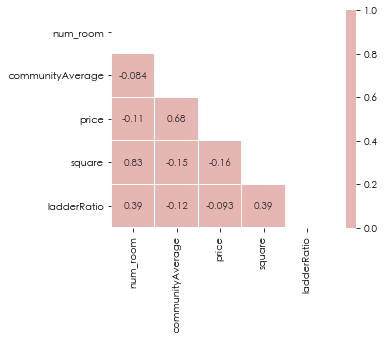

In [47]:
corr_plot(data,['num_room','communityAverage','price','square','ladderRatio'])

In [2]:
# 自定义函数绘制直方图和QQ图
def distribute_plot(df, columns=[]):
    # lst:创建列表用于储存变量均值,方差信息
    lst = []
    for col in columns:
        # 绘制直方图
        plt.figure(figsize=(8, 6))
        # 拟合正太分布均值,方差参数
        (mu, sigma) = stats.norm.fit(df[col])
        print('变量{}:$\mu$ = {:.3f} and $\sigma$ = {:.3f}'.format(col, mu, sigma))
        # 绘制直方图
        sns.distplot(df[col], fit=stats.norm)
        plt.legend(['Normal dist.($\mu=$ {:.3f} and $\sigma=$ {:.3f})'.format(mu, sigma)], loc='best')
        plt.ylabel('Frequency')
        plt.title('%s distribution' % col)
        plt.show()
        # 绘制QQ图
        plt.figure(figsize=(8, 6))
        stats.probplot(df[col], plot=plt)
        lst.append((col, mu, sigma))
        plt.show()
    return lst

变量num_room:$\mu$ = 5.365 and $\sigma$ = 1.461


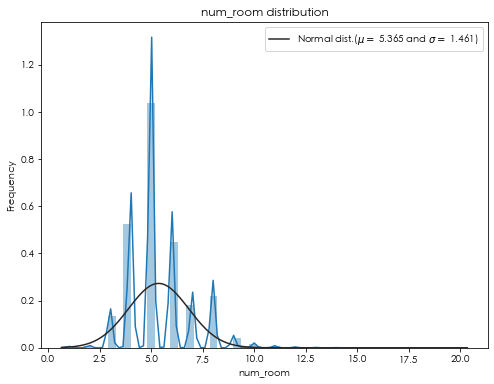

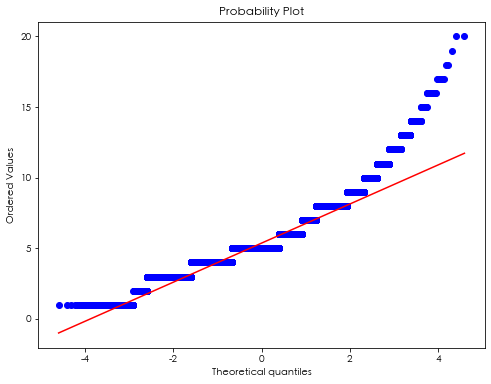

变量communityAverage:$\mu$ = 63708.681 and $\sigma$ = 22335.995


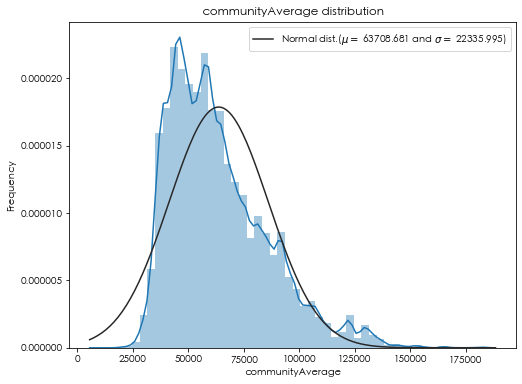

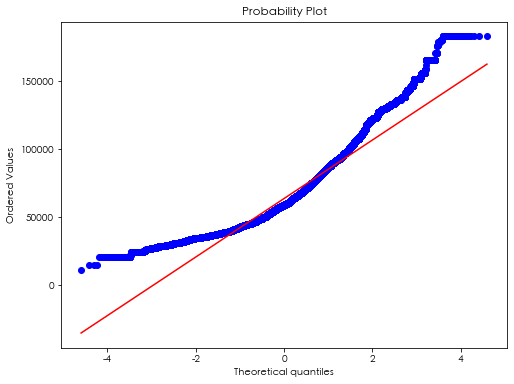

变量price:$\mu$ = 43530.436 and $\sigma$ = 21708.990


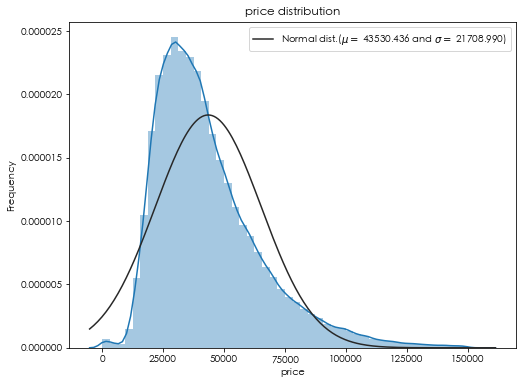

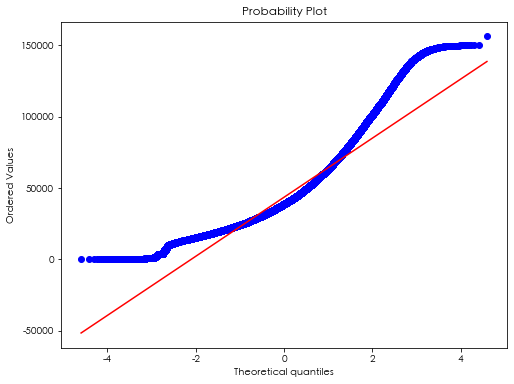

变量square:$\mu$ = 83.241 and $\sigma$ = 37.235


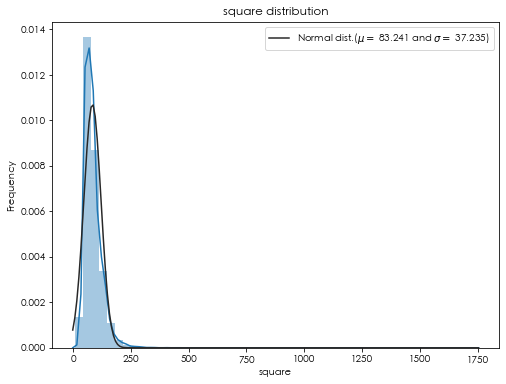

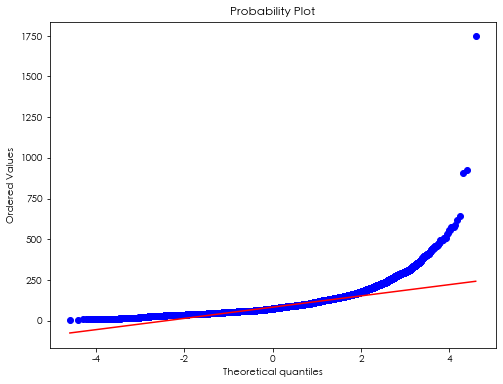

变量ladderRatio:$\mu$ = 0.375 and $\sigma$ = 0.161


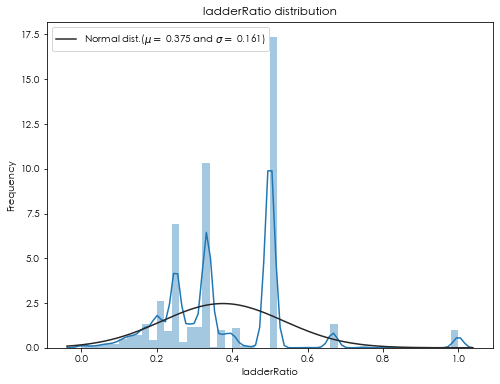

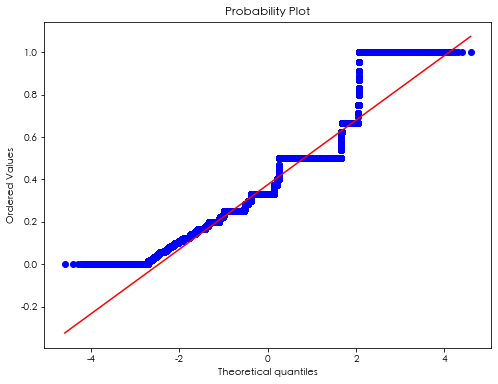

[('num_room', 5.3647314890027005, 1.4609853985120813),
 ('communityAverage', 63708.68065334592, 22335.994714316974),
 ('price', 43530.43637937469, 21708.99016098266),
 ('square', 83.24059670504406, 37.2346024912451),
 ('ladderRatio', 0.37526586712916066, 0.16138578249173213)]

In [10]:
distribute_plot(data,['num_room','communityAverage','price','square','ladderRatio'])

In [44]:
len(data.loc[data['ladderRatio']>1,'ladderRatio']) # 存在1030条数据楼户比例大于1

2

In [6]:
background = './datasets/beijing_map.png'

In [26]:
def kde_plot(background, df, lng, lat, title, save_path=None):
    bg = imageio.imread(background)
    fig,axes = plt.subplots(1,1,figsize=(15, 15))
    #axes.imshow(bg)
    sns.kdeplot(df[lat], df[lng], n_levels=40, shade = False, cmap=cm.Blues, alpha=1)
    plt.title(title)
    if save_path:
        fig.savefig(save_path,transparent = True)
        
    

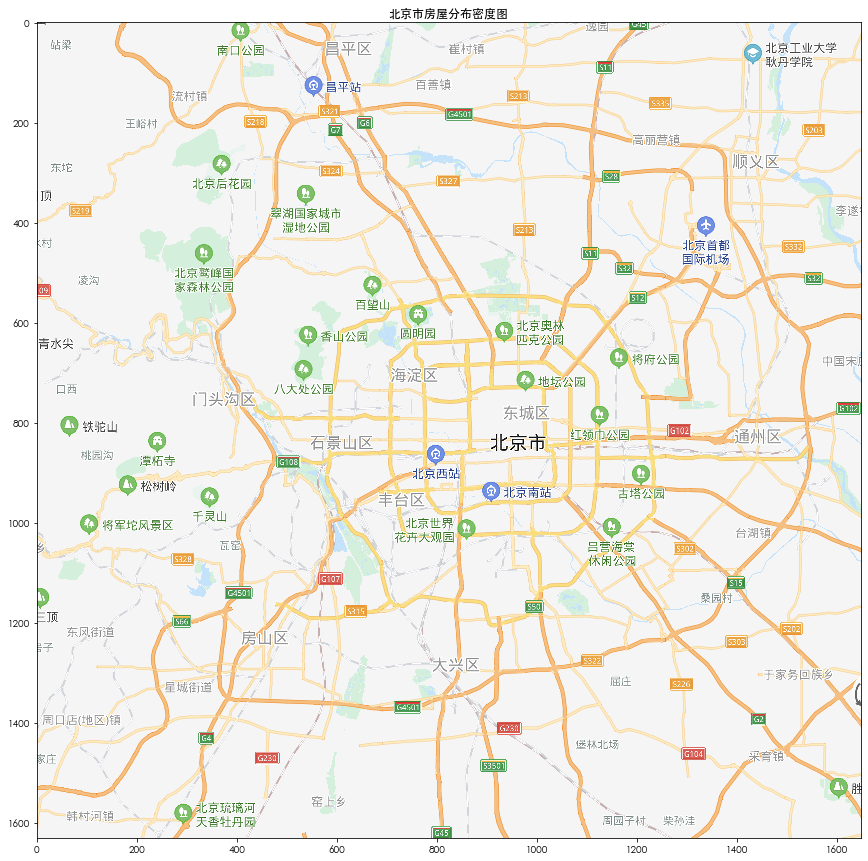

In [25]:
bg1 = kde_plot(background, data,'Lat','Lng','北京市房屋分布密度图','./datasets/bg1.png')

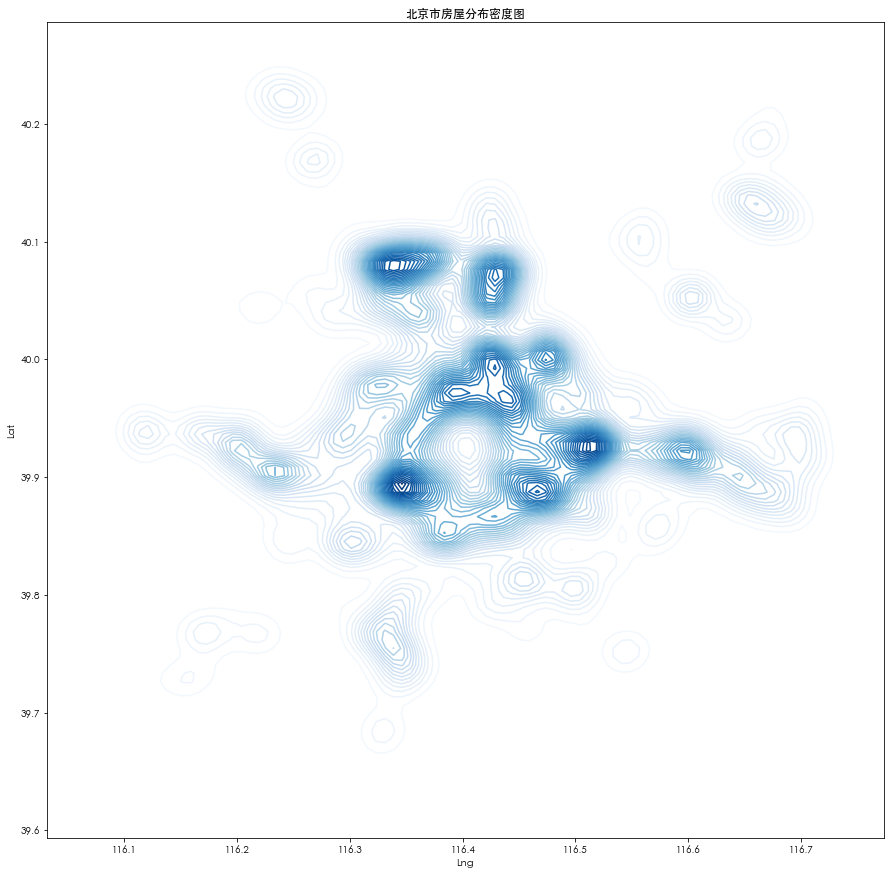

In [27]:
bg2 = kde_plot(background, data,'Lat','Lng','北京市房屋分布密度图','./datasets/bg2.png')

In [28]:
import cv2

In [30]:
# 图像融合
def fuse_image(image1, image2):
    ori_img1 = cv2.imread(image1, 1)
    ori_img2 = cv2.imread(image2, 1)
    height, width = ori_img1.shape[0:2]
    # ROI
    roi_height = int(height / 1)
    roi_width = int(width / 1)
    roi_img1 = ori_img1[0:roi_height, 0:roi_width]
    roi_img2 = ori_img2[0:roi_height, 0:roi_width]
    # open-cv API
    dst_img = cv2.addWeighted(roi_img1, 0.6, roi_img2, 0.4, 0)
    cv2.imshow('pic', dst_img)
    cv2.waitKey(0)
    return dst_img

In [31]:
fuse_image('./datasets/bg2.png','./datasets/bg1.png')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]